# <span style='color:#F52887'> Import Libraries </span>

In [42]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['text.color'] = 'm'

import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# <span style='color:#F52887'> Read Data </span>

In [2]:
kid=pd.read_csv("Kidney.csv")
kid.head()

age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
0  48  80  1.020  1  0       ?    normal  notpresent  notpresent  121  ...   
1   7  50  1.020  4  0       ?    normal  notpresent  notpresent    ?  ...   
2  62  80  1.010  2  3  normal    normal  notpresent  notpresent  423  ...   
3  48  70  1.005  4  0  normal  abnormal     present  notpresent  117  ...   
4  51  80  1.010  2  0  normal    normal  notpresent  notpresent  106  ...   

  pcv  wbcc rbcc  htn   dm cad appet   pe  ane class  
0  44  7800  5.2  yes  yes  no  good   no   no   ckd  
1  38  6000    ?   no   no  no  good   no   no   ckd  
2  31  7500    ?   no  yes  no  poor   no  yes   ckd  
3  32  6700  3.9  yes   no  no  poor  yes  yes   ckd  
4  35  7300  4.6   no   no  no  good   no   no   ckd  

[5 rows x 25 columns]

## <span style='color:#FF00FF'> Shuffle Dataframe </span>

In [3]:
kid=kid.sample(frac=1)
cls=kid['class']
kid.head()

age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
139  41  70  1.015  2  0       ?  abnormal  notpresent     present    ?  ...   
386  46  70  1.025  0  0  normal    normal  notpresent  notpresent  100  ...   
346  33  60      ?  ?  ?  normal    normal  notpresent  notpresent  130  ...   
297  53  60  1.025  0  0  normal    normal  notpresent  notpresent  116  ...   
79   56  80  1.010  1  0       ?    normal  notpresent  notpresent  165  ...   

    pcv   wbcc rbcc  htn   dm cad appet   pe  ane   class  
139  33      ?    ?  yes   no  no  good  yes  yes     ckd  
386  43   5700  6.5   no   no  no  good   no   no  notckd  
346  52   4300  5.8   no   no  no  good   no   no  notckd  
297  45   7700  5.2    ?    ?   ?  good   no   no  notckd  
79   40  11800    5  yes  yes  no  poor  yes   no     ckd  

[5 rows x 25 columns]

## <span style='color:#FF00FF'> Data Attributes </span>

In [4]:
print("______________________________________________________")
print("\tData has {} Rows and {} Columns.".format(kid.shape[0],kid.shape[1]))
print("______________________________________________________")

______________________________________________________
	Data has 400 Rows and 25 Columns.
______________________________________________________


## <span style='color:#FF00FF'> Data Information </span>

In [5]:
kid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 139 to 110
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    

## <span style='color:#FF00FF'> Data Attributes </span>

In [6]:
kid.describe()

age   bp     sg   al   su     rbc      pc         pcc          ba  \
count   400  400    400  400  400     400     400         400         400   
unique   77   11      6    7    7       3       3           3           3   
top      60   80  1.020    0    0  normal  normal  notpresent  notpresent   
freq     19  116    106  199  290     201     259         354         374   

        bgr  ...  pcv wbcc rbcc  htn   dm  cad appet   pe  ane class  
count   400  ...  400  400  400  400  400  400   400  400  400   400  
unique  147  ...   43   90   46    3    3    3     3    3    3     2  
top       ?  ...    ?    ?    ?   no   no   no  good   no   no   ckd  
freq     44  ...   71  106  131  251  261  364   317  323  339   250  

[4 rows x 25 columns]

# <span style='color:#F52887'> Data Preprocessing </span>

In [7]:
uchar="?"            # Replace "?" by NAN
for i in range(len(kid)):
    for j in range(len(kid.columns.tolist())):
        if kid.iloc[i][j]=="?":
            kid.iloc[i][j]=np.nan

## <span style='color:#FF00FF'> Check NAN values </span>

In [8]:
kid.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

## <span style='color:#FF00FF'> Data Cleaning-Removing NAN </span>

In [9]:
kid=kid.fillna(0)

In [10]:
kid.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [11]:
kid.head(2)

age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
139  41  70  1.015  2  0       0  abnormal  notpresent     present    0  ...   
386  46  70  1.025  0  0  normal    normal  notpresent  notpresent  100  ...   

    pcv  wbcc rbcc  htn  dm cad appet   pe  ane   class  
139  33     0    0  yes  no  no  good  yes  yes     ckd  
386  43  5700  6.5   no  no  no  good   no   no  notckd  

[2 rows x 25 columns]

## <span style='color:#FF00FF'> Data Reconstruction with variable types </span>

### <span style='color:#A74AC7'> Reconstruction of Numerical data </span>

In [12]:
kid['age']=np.array(kid['age'],float)
kid['bp']=np.array(kid['bp'],float)
kid['sg']=np.array(kid['sg'],float)
kid['al']=np.array(kid['al'],int)
kid['su']=np.array(kid['su'],int)
kid['bgr']=np.array(kid['bgr'],int)
kid['bu']=np.array(kid['bu'],float)
kid['sc']=np.array(kid['sc'],float)
kid['sod']=np.array(kid['sod'],float)
kid['pot']=np.array(kid['pot'],float)
kid['hemo']=np.array(kid['hemo'],float)
kid['pcv']=np.array(kid['pcv'],float)
kid['wbcc']=np.array(kid['wbcc'],int)
kid['rbcc']=np.array(kid['rbcc'],float)
kid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 139 to 110
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    int32  
 4   su      400 non-null    int32  
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   pcc     400 non-null    object 
 8   ba      400 non-null    object 
 9   bgr     400 non-null    int32  
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    int32  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    object 
 19  dm      400 non-null    object 
 20  cad     400 non-null    object 
 21  appet   400 non-null    object 
 22  

### <span style='color:#A74AC7'> Reconstruction of Object data </span>

In [13]:
objtypes=kid.dtypes[kid.dtypes=='object'].index.tolist()
objtypes

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

### <span style='color:#571B7E'> Before Reconstruction </span>

In [14]:
for k in range(len(objtypes)):
    print(kid[objtypes[k]].value_counts())

normal      201
0           152
abnormal     47
Name: rbc, dtype: int64
normal      259
abnormal     76
0            65
Name: pc, dtype: int64
notpresent    354
present        42
0               4
Name: pcc, dtype: int64
notpresent    374
present        22
0               4
Name: ba, dtype: int64
no     251
yes    147
0        2
Name: htn, dtype: int64
no     261
yes    137
0        2
Name: dm, dtype: int64
no     364
yes     34
0        2
Name: cad, dtype: int64
good    317
poor     82
0         1
Name: appet, dtype: int64
no     323
yes     76
0        1
Name: pe, dtype: int64
no     339
yes     60
0        1
Name: ane, dtype: int64
ckd       250
notckd    150
Name: class, dtype: int64


### <span style='color:#571B7E'> After Reconstruction </span>

In [15]:
for k in range(len(objtypes)):
    untyp=kid[objtypes[k]].value_counts().index.tolist()
    try:
        zind=untyp.index(0)
    except:
        pass
    try:
        untyp.remove(0)
    except:
        pass
    unval=kid[objtypes[k]].value_counts().tolist()
    try:
        unval.remove(unval[zind])
    except:
        pass
    mxtyp=untyp[unval.index(max(unval))]
    for i in range(len(kid[objtypes[k]])):
        if kid[objtypes[k]][i] == 0:
            kid[objtypes[k]][i]=mxtyp
    print(kid[objtypes[k]].value_counts())

normal      353
abnormal     47
Name: rbc, dtype: int64
normal      324
abnormal     76
Name: pc, dtype: int64
notpresent    358
present        42
Name: pcc, dtype: int64
notpresent    378
present        22
Name: ba, dtype: int64
no     253
yes    147
Name: htn, dtype: int64
no     263
yes    137
Name: dm, dtype: int64
no     366
yes     34
Name: cad, dtype: int64
good    318
poor     82
Name: appet, dtype: int64
no     324
yes     76
Name: pe, dtype: int64
no     340
yes     60
Name: ane, dtype: int64
ckd       250
notckd    150
Name: class, dtype: int64


## <span style='color:#FF00FF'> Printing Cleaned Data </span>

In [16]:
kid.head()

age    bp     sg  al  su     rbc        pc         pcc          ba  bgr  \
139  41.0  70.0  1.015   2   0  normal  abnormal  notpresent     present    0   
386  46.0  70.0  1.025   0   0  normal    normal  notpresent  notpresent  100   
346  33.0  60.0  0.000   0   0  normal    normal  notpresent  notpresent  130   
297  53.0  60.0  1.025   0   0  normal    normal  notpresent  notpresent  116   
79   56.0  80.0  1.010   1   0  normal    normal  notpresent  notpresent  165   

     ...   pcv   wbcc  rbcc  htn   dm  cad  appet   pe  ane   class  
139  ...  33.0      0   0.0  yes   no   no   good  yes  yes     ckd  
386  ...  43.0   5700   6.5   no   no   no   good   no   no  notckd  
346  ...  52.0   4300   5.8   no   no   no   good   no   no  notckd  
297  ...  45.0   7700   5.2   no   no   no   good   no   no  notckd  
79   ...  40.0  11800   5.0  yes  yes   no   poor  yes   no     ckd  

[5 rows x 25 columns]

In [17]:
kid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 139 to 110
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    int32  
 4   su      400 non-null    int32  
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   pcc     400 non-null    object 
 8   ba      400 non-null    object 
 9   bgr     400 non-null    int32  
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    int32  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    object 
 19  dm      400 non-null    object 
 20  cad     400 non-null    object 
 21  appet   400 non-null    object 
 22  

## <span style='color:#FF00FF'> Data Attributes </span>

Data Attributes

    age - age
    bp - blood pressure
    sg - specific gravity
    al - albumin
    su - sugar
    rbc - red blood cells
    pc - pus cell
    pcc - pus cell clumps
    ba - bacteria
    bgr - blood glucose random
    bu - blood urea
    sc - serum creatinine
    sod - sodium
    pot - potassium
    hemo - hemoglobin
    pcv - packed cell volume
    wc - white blood cell count
    rc - red blood cell count
    htn - hypertension
    dm - diabetes mellitus
    cad - coronary artery disease
    appet - appetite
    pe - pedal edema
    ane - anemia
    class - class

# <span style='color:#F52887'> Data Analysis (EDA) </span>

## <span style='color:#FF00FF'> Analysis of Age with CKD </span>

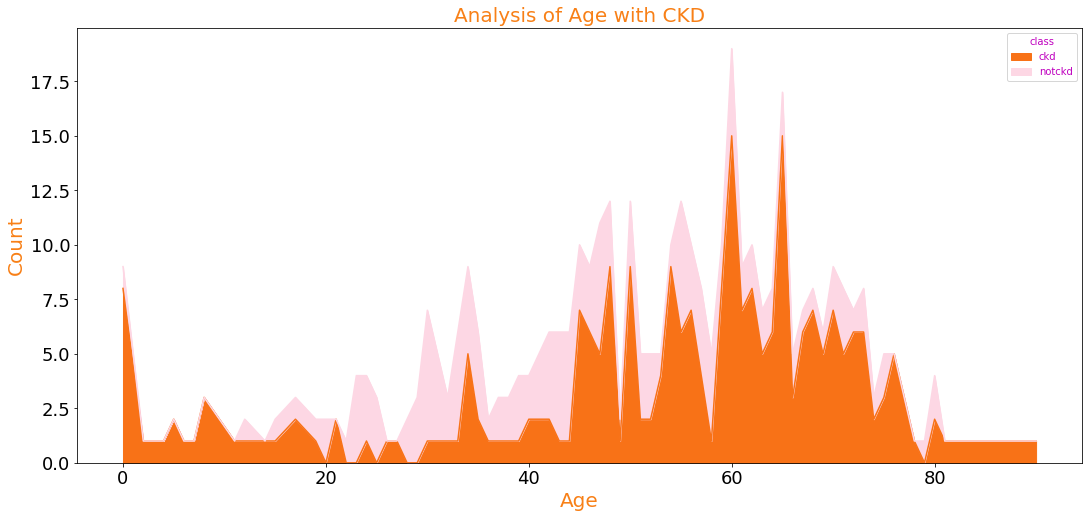

In [18]:
pd.crosstab(kid.age,kid['class']).plot(kind="area",figsize=(18,8),color=['#F87217','#FDD7E4'])
plt.title('Analysis of Age with CKD', fontsize=20,color="#F88017")
plt.xlabel('Age', fontsize=20,color="#F88017")
plt.ylabel('Count', fontsize=20,color="#F88017")
plt.show()

## <span style='color:#FF00FF'> Analysis of Blood Pressure with CKD </span>

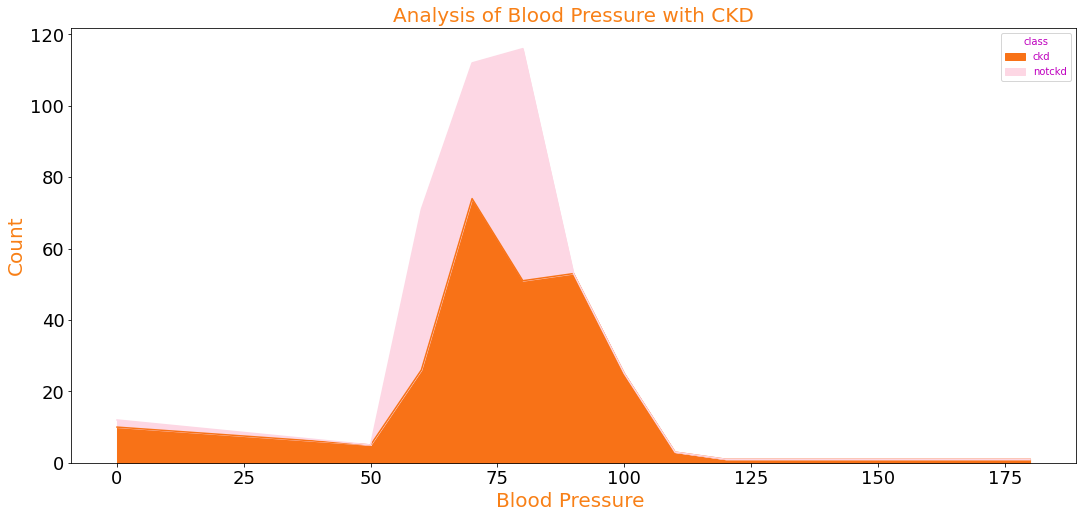

In [19]:
pd.crosstab(kid.bp,kid['class']).plot(kind="area",figsize=(18,8),color=['#F87217','#FDD7E4'])
plt.title('Analysis of Blood Pressure with CKD', fontsize=20,color="#F88017")
plt.xlabel('Blood Pressure ', fontsize=20,color="#F88017")
plt.ylabel('Count', fontsize=20,color="#F88017")
plt.show()

## <span style='color:#FF00FF'> Analysis of Serum Albumin with CKD </span>

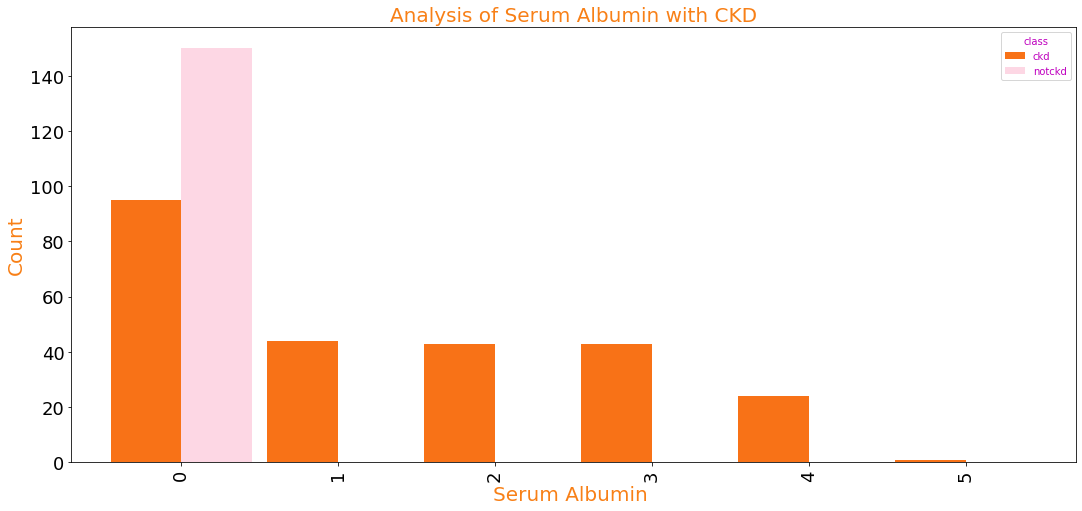

In [20]:
pd.crosstab(kid.al,kid['class']).plot(kind="bar",figsize=(18,8),color=['#F87217','#FDD7E4'],width=0.9)
plt.title('Analysis of Serum Albumin with CKD', fontsize=20,color="#F88017")
plt.xlabel('Serum Albumin ', fontsize=20,color="#F88017")
plt.ylabel('Count', fontsize=20,color="#F88017")
plt.show()

## <span style='color:#FF00FF'> Analysis of Blood Sugar with CKD </span>

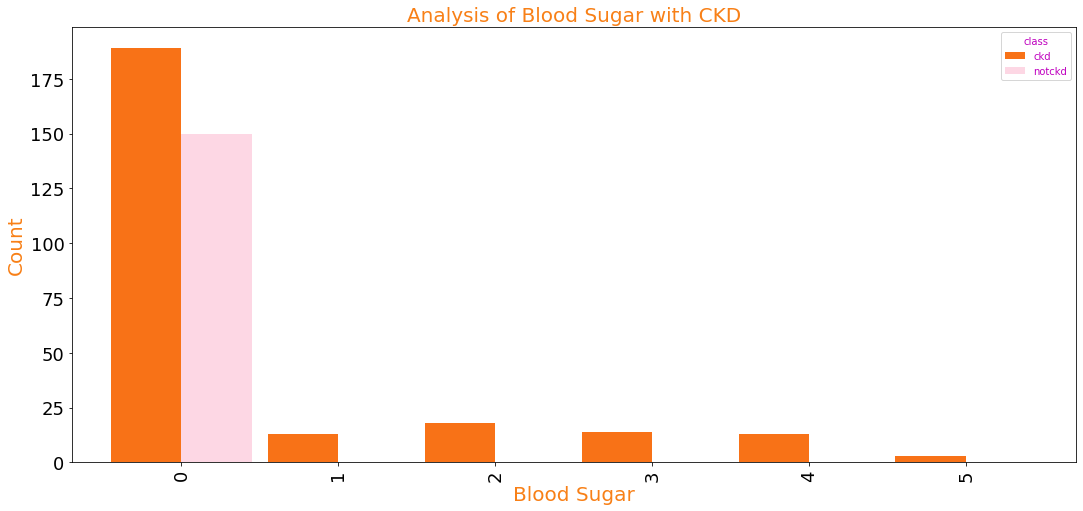

In [21]:
pd.crosstab(kid.su,kid['class']).plot(kind="bar",figsize=(18,8),color=['#F87217','#FDD7E4'],width=0.9)
plt.title('Analysis of Blood Sugar with CKD', fontsize=20,color="#F88017")
plt.xlabel('Blood Sugar', fontsize=20,color="#F88017")
plt.ylabel('Count', fontsize=20,color="#F88017")
plt.show()

## <span style='color:#FF00FF'> Analysis of Blood Cells with CKD </span>

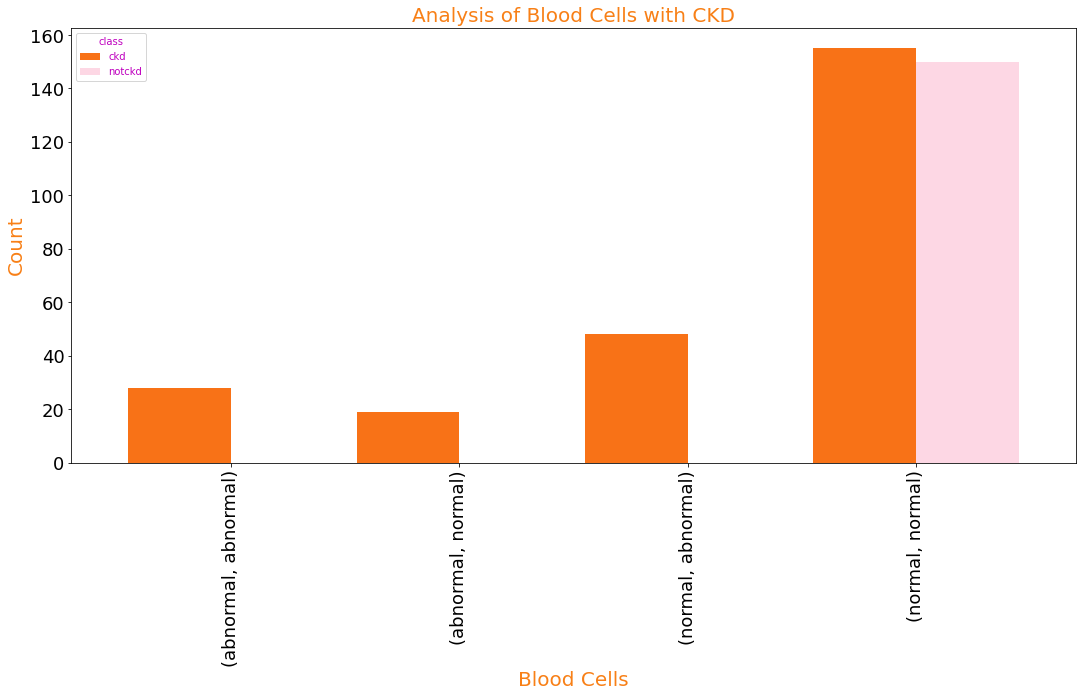

class              ckd  notckd
rbc      pc                   
abnormal abnormal   28       0
         normal     19       0
normal   abnormal   48       0
         normal    155     150

In [22]:
pd.crosstab([kid['rbc'],kid['pc']],kid['class'], rownames=['rbc', 'pc'], colnames=['class']).plot(kind="bar",figsize=(18,8),color=['#F87217','#FDD7E4'],width=0.9)
plt.title('Analysis of Blood Cells with CKD', fontsize=20,color="#F88017")
plt.xlabel('Blood Cells', fontsize=20,color="#F88017")
plt.ylabel('Count', fontsize=20,color="#F88017")
plt.show()
pd.crosstab([kid['rbc'],kid['pc']],kid['class'], rownames=['rbc', 'pc'], colnames=['class'])

## <span style='color:#FF00FF'> Effect of Bacteria with CKD </span>

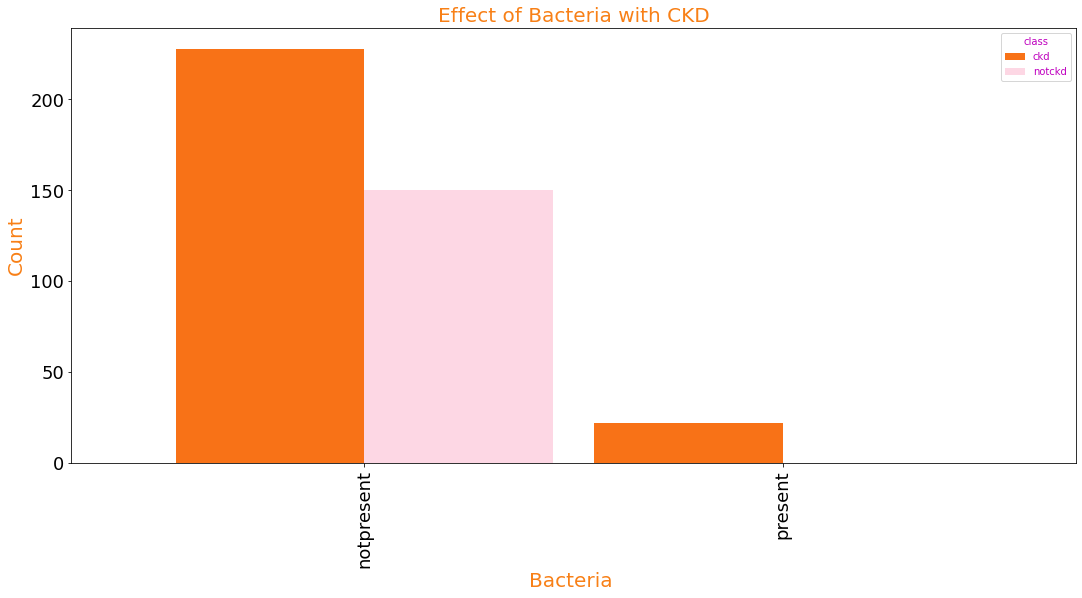

In [23]:
pd.crosstab(kid.ba,kid['class']).plot(kind="bar",figsize=(18,8),color=['#F87217','#FDD7E4'],width=0.9)
plt.title('Effect of Bacteria with CKD', fontsize=20,color="#F88017")
plt.xlabel('Bacteria ', fontsize=20,color="#F88017")
plt.ylabel('Count', fontsize=20,color="#F88017")
plt.show()

## <span style='color:#FF00FF'> Tendency of CKD by Blood Urea </span>

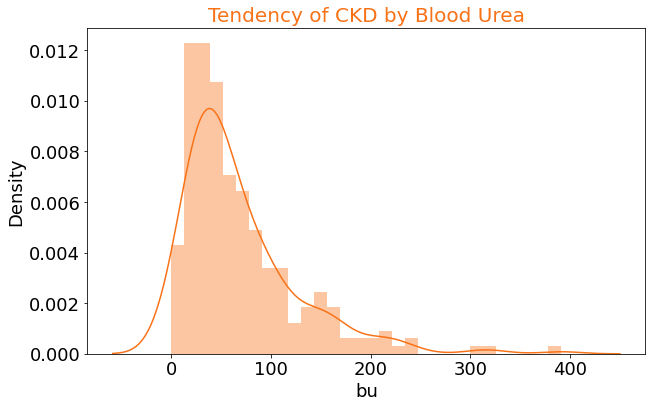

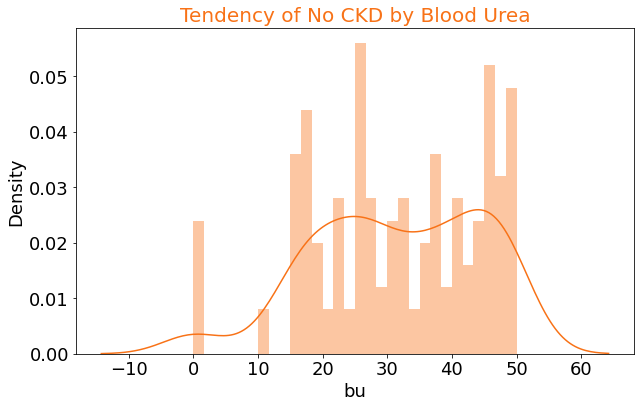

In [24]:
plt.figure(figsize=(10,6))
df=kid[kid['class']=='ckd']
plt.title("Tendency of CKD by Blood Urea", fontsize=20,color="#F87217") 
sns.distplot(df['bu'], kde = True, color ='#F87217', bins = 30)
plt.show()

plt.figure(figsize=(10,6))
df=kid[kid['class']=='notckd']
plt.title("Tendency of No CKD by Blood Urea", fontsize=20,color="#F87217") 
sns.distplot(df['bu'], kde = True, color ='#F87217', bins = 30)
plt.show()

## <span style='color:#FF00FF'> Tendency of CKD by the amount of Potassium and Sodium </span>

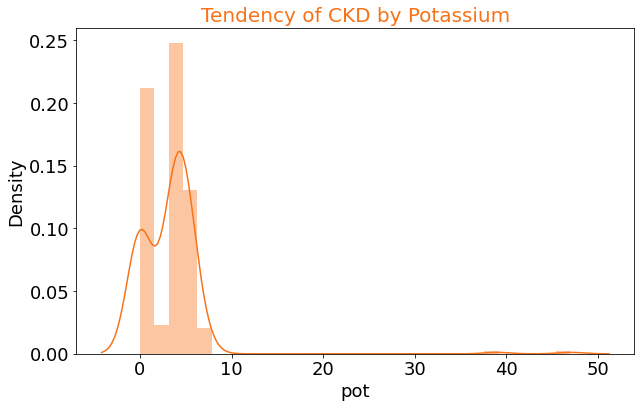

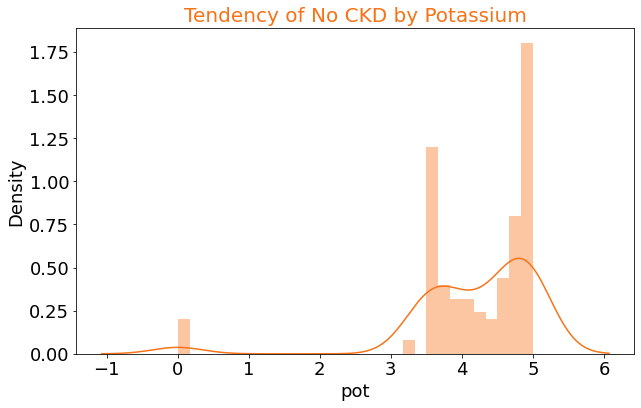

In [25]:
plt.figure(figsize=(10,6))
df=kid[kid['class']=='ckd']
plt.title("Tendency of CKD by Potassium", fontsize=20,color="#F87217") 
sns.distplot(df['pot'], kde = True, color ='#F87217', bins = 30)
plt.show()

plt.figure(figsize=(10,6))
df=kid[kid['class']=='notckd']
plt.title("Tendency of No CKD by Potassium", fontsize=20,color="#F87217") 
sns.distplot(df['pot'], kde = True, color ='#F87217', bins = 30)
plt.show()

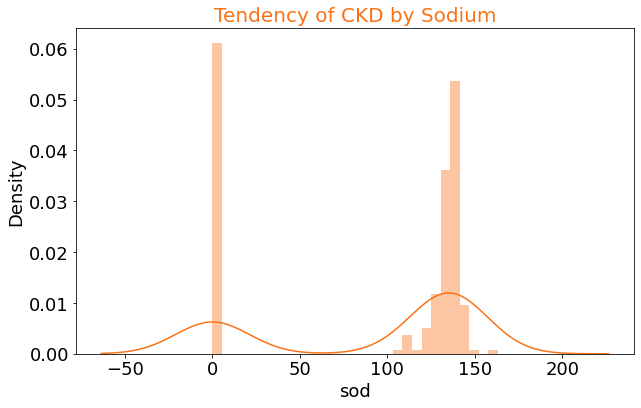

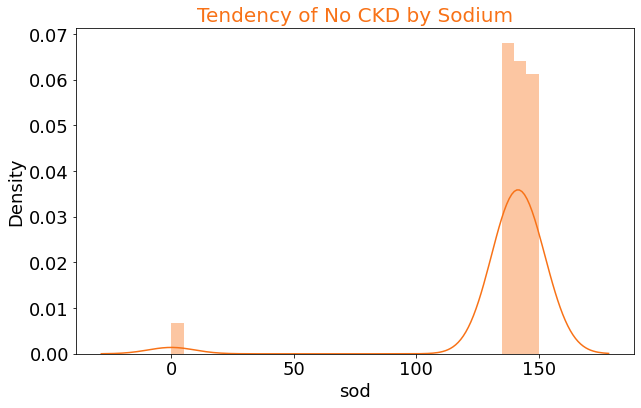

In [26]:
plt.figure(figsize=(10,6))
df=kid[kid['class']=='ckd']
plt.title("Tendency of CKD by Sodium", fontsize=20,color="#F87217") 
sns.distplot(df['sod'], kde = True, color ='#F87217', bins = 30)
plt.show()

plt.figure(figsize=(10,6))
df=kid[kid['class']=='notckd']
plt.title("Tendency of No CKD by Sodium", fontsize=20,color="#F87217") 
sns.distplot(df['sod'], kde = True, color ='#F87217', bins = 30)
plt.show()

## <span style='color:#FF00FF'> Tendency of CKD by Diabetes Mellitus </span>

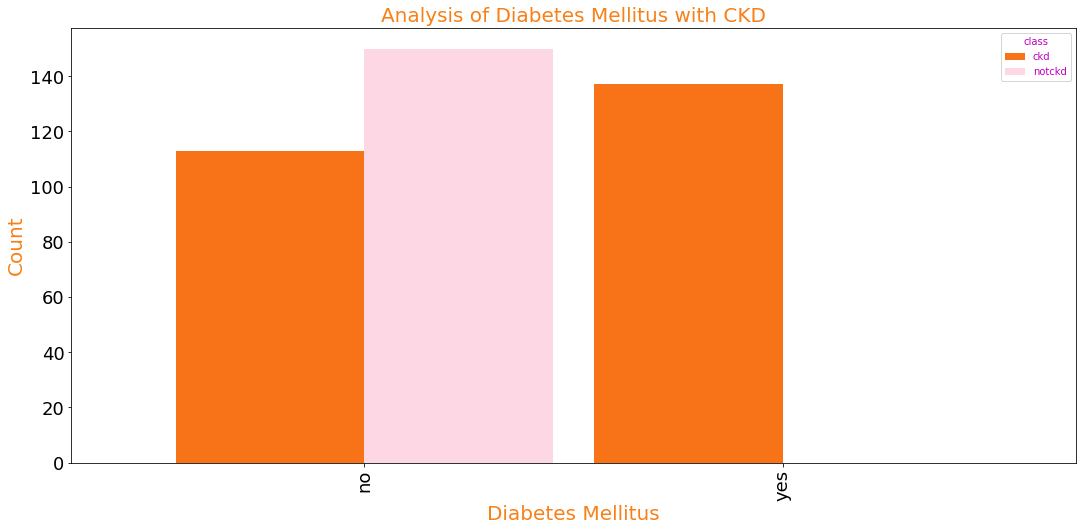

In [27]:
pd.crosstab(kid.dm,kid['class']).plot(kind="bar",figsize=(18,8),color=['#F87217','#FDD7E4'],width=0.9)
plt.title('Analysis of Diabetes Mellitus with CKD', fontsize=20,color="#F88017")
plt.xlabel('Diabetes Mellitus', fontsize=20,color="#F88017")
plt.ylabel('Count', fontsize=20,color="#F88017")
plt.show()

# <span style='color:#F52887'> Data Analytics </span>

## <span style='color:#FF00FF'> Label Encoding </span>

In [28]:
for k in range(len(objtypes)):
    kid[objtypes[k]]=kid[objtypes[k]].replace(kid[objtypes[k]].unique(),[i+1 for i in range(len(kid[objtypes[k]].unique()))])
kid.head()

age    bp     sg  al  su  rbc  pc  pcc  ba  bgr  ...   pcv   wbcc  rbcc  \
139  41.0  70.0  1.015   2   0    1   1    1   1    0  ...  33.0      0   0.0   
386  46.0  70.0  1.025   0   0    1   2    1   2  100  ...  43.0   5700   6.5   
346  33.0  60.0  0.000   0   0    1   2    1   2  130  ...  52.0   4300   5.8   
297  53.0  60.0  1.025   0   0    1   2    1   2  116  ...  45.0   7700   5.2   
79   56.0  80.0  1.010   1   0    1   2    1   2  165  ...  40.0  11800   5.0   

     htn  dm  cad  appet  pe  ane  class  
139    1   1    1      1   1    1      1  
386    2   1    1      1   2    2      2  
346    2   1    1      1   2    2      2  
297    2   1    1      1   2    2      2  
79     1   2    1      2   1    2      1  

[5 rows x 25 columns]

## <span style='color:#FF00FF'> Feature Selection- Correlation </span>

### <span style='color:#571B7E'> Correlation Visualization </span>

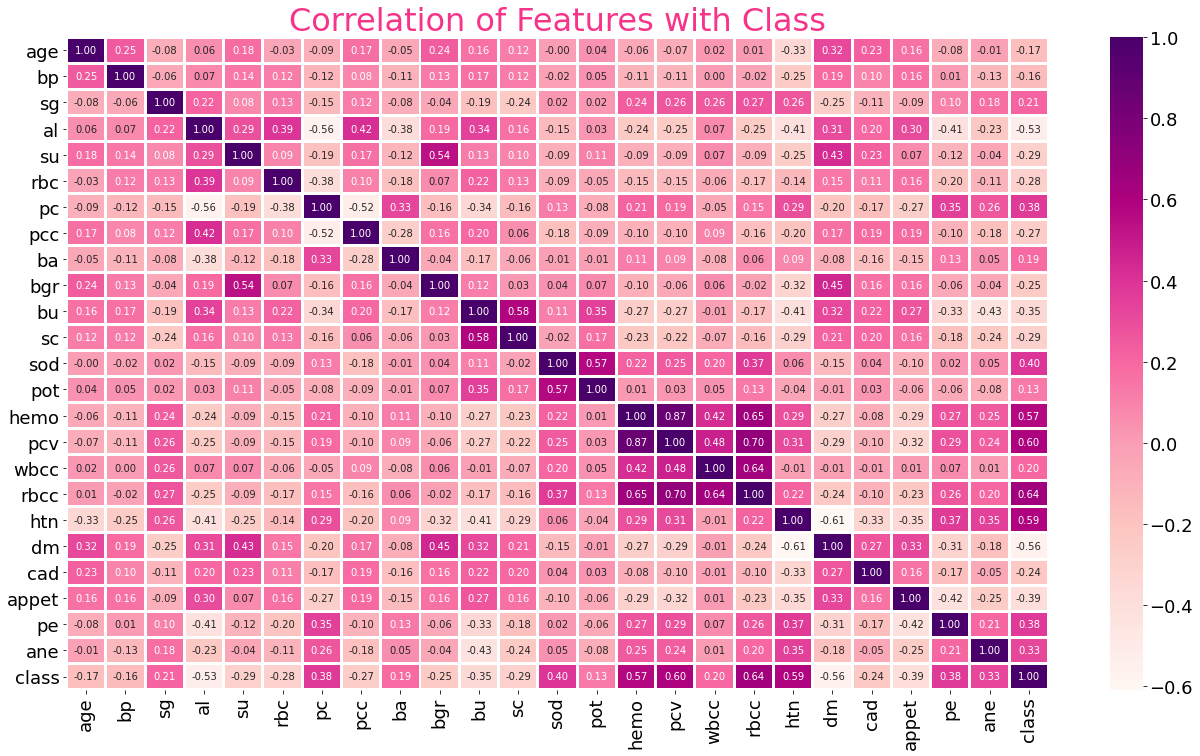

In [29]:
plt.figure(figsize=(22,12))
plt.title("Correlation of Features with Class", fontsize=32,color="#F6358A")
sns.heatmap(kid.corr(),annot=True,cmap='RdPu',fmt='.2f',linewidths=2)
plt.show()

### <span style='color:#571B7E'> Barplot for Correlation with Class </span>

Features  Correlation
19       dm    -0.559060
3        al    -0.531562
21    appet    -0.393341
10       bu    -0.354504
4        su    -0.294555
11       sc    -0.288436
5       rbc    -0.282642
7       pcc    -0.265313
9       bgr    -0.249772
20      cad    -0.236088
0       age    -0.171566
1        bp    -0.156006
13      pot     0.132806
8        ba     0.186871
16     wbcc     0.201643
2        sg     0.213872
23      ane     0.325396
6        pc     0.375154
22       pe     0.375154
12      sod     0.396086
14     hemo     0.569312
18      htn     0.590438
15      pcv     0.599753
17     rbcc     0.643162

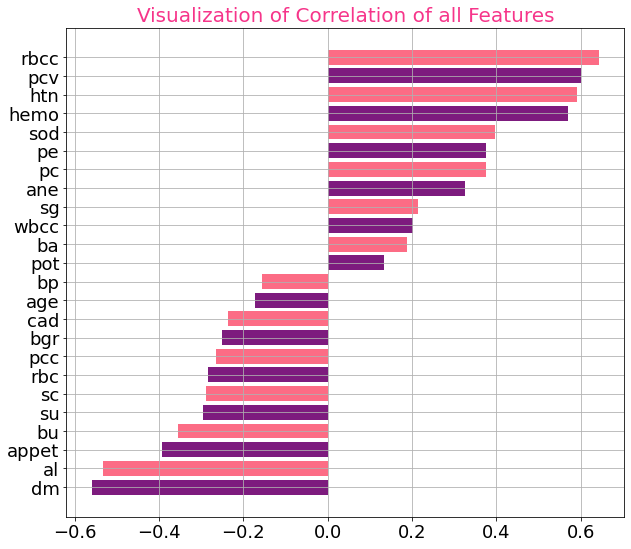

In [30]:
vizcr=pd.DataFrame({"Features":kid.corr().columns.tolist()[:-1],"Correlation":kid.corr()['class'].tolist()[:-1]})
vizcr=vizcr.sort_values(by="Correlation")
cols=["#7D1B7E","#FC6C85"]
plt.figure(figsize=(10,9))
plt.title("Visualization of Correlation of all Features", fontsize=20,color="#F6358A")
plt.barh(vizcr['Features'],vizcr['Correlation'],color=cols)
plt.grid()
vizcr

### <span style='color:#571B7E'> Barplot for Selected Features as Predictor Features</span>

Final_Features  Correlation
15             dm    -0.559060
1              al    -0.531562
17          appet    -0.393341
7              bu    -0.354504
2              su    -0.294555
8              sc    -0.288436
3             rbc    -0.282642
5             pcc    -0.265313
6             bgr    -0.249772
16            cad    -0.236088
12           wbcc     0.201643
0              sg     0.213872
19            ane     0.325396
4              pc     0.375154
18             pe     0.375154
9             sod     0.396086
10           hemo     0.569312
14            htn     0.590438
11            pcv     0.599753
13           rbcc     0.643162

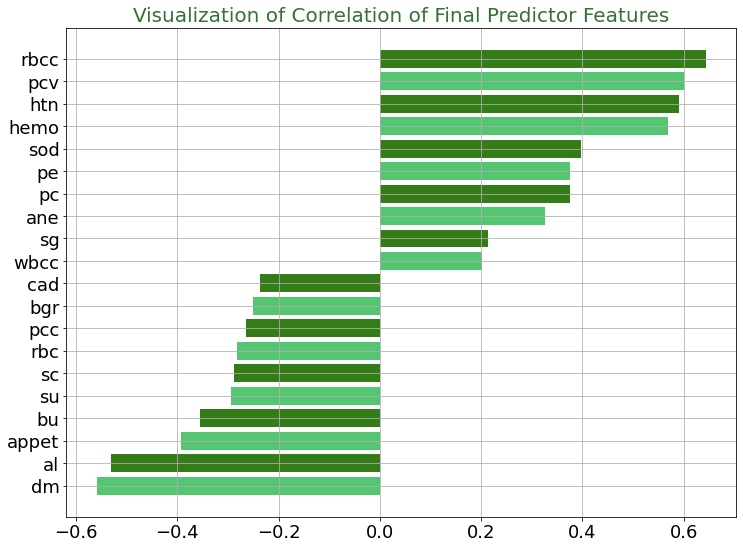

In [31]:
cor=kid.corr()
corcol=cor.columns.tolist()[:-1]
corval=cor['class'].tolist()[:-1]
finfet=[]
finval=[]
for i in range(len(corval)):
    if corval[i]>0.2 or corval[i]<-0.2:
        finfet.append(corcol[i])
        finval.append(corval[i])
fincr=pd.DataFrame({"Final_Features":finfet,"Correlation":finval})
fincr=fincr.sort_values(by="Correlation")
cols=["#54C571","#347C17"]
plt.figure(figsize=(12,9))
plt.title("Visualization of Correlation of Final Predictor Features", fontsize=20,color="#347235")
plt.barh(fincr['Final_Features'],fincr['Correlation'],color=cols)
plt.grid()
fincr

In [32]:
kid=kid.drop('class',axis=1)
kid['class']=cls
kid.head()

age    bp     sg  al  su  rbc  pc  pcc  ba  bgr  ...   pcv   wbcc  rbcc  \
139  41.0  70.0  1.015   2   0    1   1    1   1    0  ...  33.0      0   0.0   
386  46.0  70.0  1.025   0   0    1   2    1   2  100  ...  43.0   5700   6.5   
346  33.0  60.0  0.000   0   0    1   2    1   2  130  ...  52.0   4300   5.8   
297  53.0  60.0  1.025   0   0    1   2    1   2  116  ...  45.0   7700   5.2   
79   56.0  80.0  1.010   1   0    1   2    1   2  165  ...  40.0  11800   5.0   

     htn  dm  cad  appet  pe  ane   class  
139    1   1    1      1   1    1     ckd  
386    2   1    1      1   2    2  notckd  
346    2   1    1      1   2    2  notckd  
297    2   1    1      1   2    2  notckd  
79     1   2    1      2   1    2     ckd  

[5 rows x 25 columns]

## <span style='color:#FF00FF'> Creating Predictor and Response feature </span>

In [33]:
X=kid[finfet]
y=kid['class']

## <span style='color:#FF00FF'> Split Dataframe </span>

In [34]:
algos=[]
prec=[]
rcl=[]
f1=[]
acc=[]
split=0.2
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=split, random_state=10)
print("__________________________ Statistics of Data Split __________________________")
print("\n\tTrain set contains {} rows ({}% of total)".format(len(x_train),round(len(x_train)/len(kid),2)*100))
print("\tTest set contains {} rows ({}% of total)\n".format(len(x_test),round(len(x_test)/len(kid),2)*100))
print("______________________________________________________________________________")

__________________________ Statistics of Data Split __________________________

	Train set contains 320 rows (80.0% of total)
	Test set contains 80 rows (20.0% of total)

______________________________________________________________________________


## <span style='color:#FF00FF'> CKD and Not CKD in Train and Test </span>

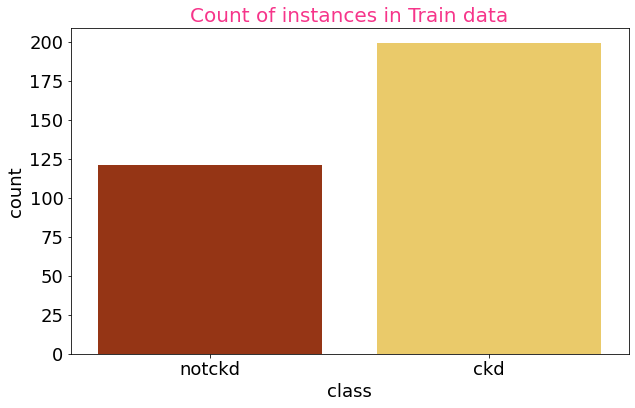

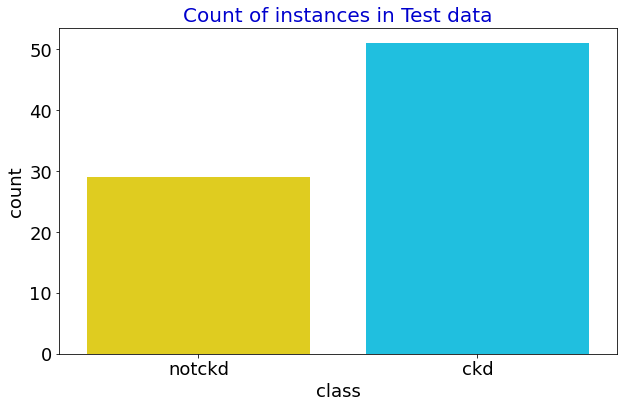

In [35]:
plt.figure(figsize=(10,6))
plt.title('Count of instances in Train data', fontsize=20,color="#F6358A")
sns.countplot(y_train,palette="afmhot")
plt.show()

plt.figure(figsize=(10,6))
plt.title('Count of instances in Test data', fontsize=20,color="MediumBlue")
sns.countplot(y_test,palette="jet_r")
plt.show()

## <span style='color:#FF00FF'> Logistic Regression </span>

Accuracy: 97.5%
              precision    recall  f1-score   support

         ckd       0.98      0.98      0.98        51
      notckd       0.97      0.97      0.97        29

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



Predicted  ckd  notckd  All
True                       
ckd         50       1   51
notckd       1      28   29
All         51      29   80

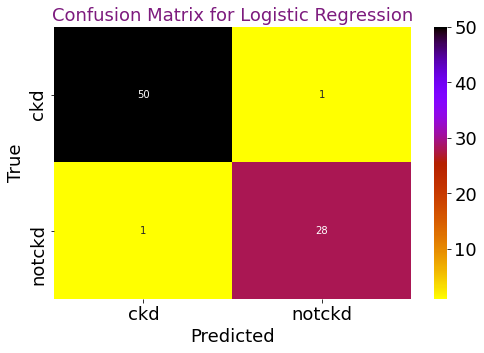

In [36]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
lrpred=lr.predict(x_test)
scorelr=accuracy_score(y_test,lrpred)
print(f'Accuracy: {round(scorelr*100,2)}%')
c1=pd.crosstab(y_test, lrpred, rownames=['True'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix for Logistic Regression", fontsize=18,color="#7D1B7E")
sns.heatmap(c1.iloc[:2,:2],fmt="d",annot=True,cmap="gnuplot_r")
pr=c1.iloc[0,0]/(c1.iloc[0,0]+c1.iloc[1,0])
rc=c1.iloc[0,0]/(c1.iloc[0,0]+c1.iloc[0,1])
prec.append(pr)
rcl.append(rc)
f1.append(2*(pr)*(rc)/(pr+rc))

acc.append(round(scorelr*100,2))
algos.append("Logistic Regression")
print(classification_report(y_test, lrpred))
c1

## <span style='color:#FF00FF'> Naive Bayes Classifier </span>

Accuracy: 87.5%
              precision    recall  f1-score   support

         ckd       0.96      0.84      0.90        51
      notckd       0.77      0.93      0.84        29

    accuracy                           0.88        80
   macro avg       0.86      0.89      0.87        80
weighted avg       0.89      0.88      0.88        80



Predicted  ckd  notckd  All
True                       
ckd         43       8   51
notckd       2      27   29
All         45      35   80

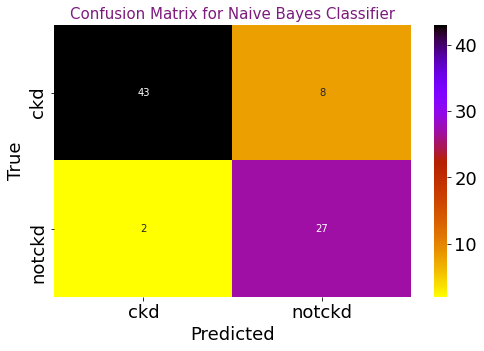

In [37]:
nbc=BernoulliNB()
nbc.fit(x_train, y_train)
nbcpred=nbc.predict(x_test)
scorenbc=accuracy_score(y_test,nbcpred)
print(f'Accuracy: {round(scorenbc*100,2)}%')
c2=pd.crosstab(y_test, nbcpred, rownames=['True'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix for Naive Bayes Classifier", fontsize=15,color="#7D1B7E")
sns.heatmap(c2.iloc[:2,:2],fmt="d",annot=True,cmap="gnuplot_r")
pr=c2.iloc[0,0]/(c2.iloc[0,0]+c2.iloc[1,0])
rc=c2.iloc[0,0]/(c2.iloc[0,0]+c2.iloc[0,1])
prec.append(pr)
rcl.append(rc)
f1.append(2*(pr)*(rc)/(pr+rc))
acc.append(round(scorenbc*100,2))
algos.append("Naive Bayes")
print(classification_report(y_test, nbcpred))
c2

## <span style='color:#FF00FF'> Decision Tree Classifier </span>

Accuracy: 93.75%
              precision    recall  f1-score   support

         ckd       0.98      0.92      0.95        51
      notckd       0.88      0.97      0.92        29

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



Predicted  ckd  notckd  All
True                       
ckd         47       4   51
notckd       1      28   29
All         48      32   80

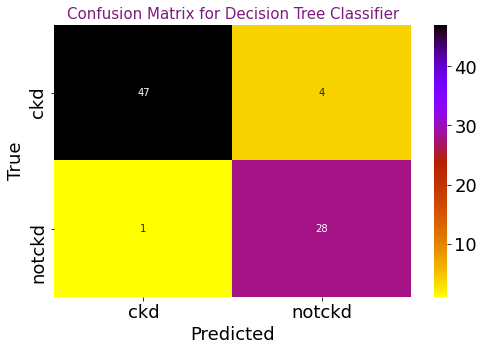

In [38]:
dtc = DecisionTreeClassifier(criterion='entropy',splitter='random')
dtc.fit(x_train, y_train)
dtcpred=dtc.predict(x_test)
scoredtc=accuracy_score(y_test,dtcpred)
print(f'Accuracy: {round(scoredtc*100,2)}%')
c3=pd.crosstab(y_test, dtcpred, rownames=['True'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix for Decision Tree Classifier", fontsize=15,color="#7D1B7E")
sns.heatmap(c3.iloc[:2,:2],fmt="d",annot=True,cmap="gnuplot_r")
pr=c3.iloc[0,0]/(c3.iloc[0,0]+c3.iloc[1,0])
rc=c3.iloc[0,0]/(c3.iloc[0,0]+c3.iloc[0,1])
prec.append(pr)
rcl.append(rc)
f1.append(2*(pr)*(rc)/(pr+rc))
acc.append(round(scoredtc*100,2))
algos.append("Decision Tree Classifier")
print(classification_report(y_test, dtcpred))
c3

## <span style='color:#FF00FF'> Random Forest Classifier </span>

Accuracy: 98.75%
              precision    recall  f1-score   support

         ckd       0.98      1.00      0.99        51
      notckd       1.00      0.97      0.98        29

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



Predicted  ckd  notckd  All
True                       
ckd         51       0   51
notckd       1      28   29
All         52      28   80

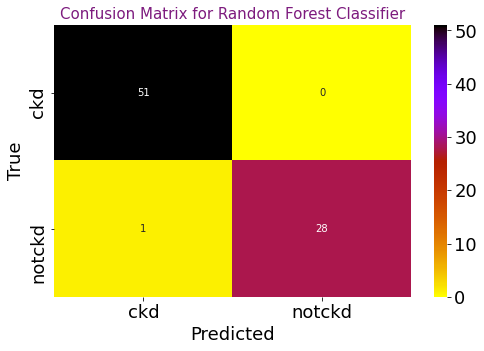

In [39]:
rfc=RandomForestClassifier(criterion="gini",max_features='sqrt')
rfc.fit(x_train, y_train)
rfcpred=rfc.predict(x_test)
scorerfc=accuracy_score(y_test,rfcpred)
print(f'Accuracy: {round(scorerfc*100,2)}%')
c4=pd.crosstab(y_test, rfcpred, rownames=['True'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=15,color="#7D1B7E")
sns.heatmap(c4.iloc[:2,:2],fmt="d",annot=True,cmap="gnuplot_r")
pr=c4.iloc[0,0]/(c4.iloc[0,0]+c4.iloc[1,0])
rc=c4.iloc[0,0]/(c4.iloc[0,0]+c4.iloc[0,1])
prec.append(pr)
rcl.append(rc)
f1.append(2*(pr)*(rc)/(pr+rc))
acc.append(round(scorerfc*100,2))
algos.append("Random Forest Classifier")
print(classification_report(y_test, rfcpred))
c4

## <span style='color:#FF00FF'> MLP Classifier </span>

Accuracy: 78.75%
              precision    recall  f1-score   support

         ckd       0.97      0.69      0.80        51
      notckd       0.64      0.97      0.77        29

    accuracy                           0.79        80
   macro avg       0.80      0.83      0.79        80
weighted avg       0.85      0.79      0.79        80



Predicted  ckd  notckd  All
True                       
ckd         35      16   51
notckd       1      28   29
All         36      44   80

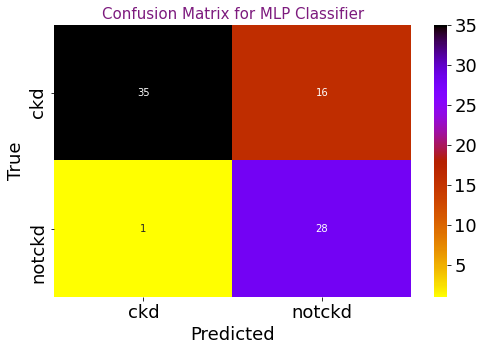

In [40]:
mlpc=MLPClassifier()
mlpc.fit(x_train, y_train)
mlpcpred=mlpc.predict(x_test)
scoremlpc=accuracy_score(y_test,mlpcpred)
print(f'Accuracy: {round(scoremlpc*100,2)}%')
c5=pd.crosstab(y_test, mlpcpred, rownames=['True'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(8,5))
plt.title("Confusion Matrix for MLP Classifier", fontsize=15,color="#7D1B7E")
sns.heatmap(c5.iloc[:2,:2],fmt="d",annot=True,cmap="gnuplot_r")
pr=c5.iloc[0,0]/(c5.iloc[0,0]+c5.iloc[1,0])
rc=c5.iloc[0,0]/(c5.iloc[0,0]+c5.iloc[0,1])
prec.append(pr)
rcl.append(rc)
f1.append(2*(pr)*(rc)/(pr+rc))
acc.append(round(scoremlpc*100,2))
algos.append("MLP Classifier")
print(classification_report(y_test, mlpcpred))
c5

## <span style='color:#FF00FF'> Comparison of Performance </span>

In [43]:
perform=pd.DataFrame({"Algorithm":algos,"Accuracy":acc,"Precision":prec,"Recall":rcl,"F1-Score":f1})
perform=perform.sort_values(by='Accuracy',ascending=False)
fig = px.bar(perform, y="Accuracy", x="Algorithm",color="Algorithm",title="Comparison of Accuracy")
fig.show()
perform

Algorithm  Accuracy  Precision    Recall  F1-Score
3  Random Forest Classifier     98.75   0.980769  1.000000  0.990291
0       Logistic Regression     97.50   0.980392  0.980392  0.980392
2  Decision Tree Classifier     93.75   0.979167  0.921569  0.949495
1               Naive Bayes     87.50   0.955556  0.843137  0.895833
4            MLP Classifier     78.75   0.972222  0.686275  0.804598

In [45]:
perform.to_csv("perfomance.csv")

## <span style='color:#FF00FF'> CKD Detection with three test sizes </span>

In [ ]:
X=kid[finfet]
y=kid['class']
base=['Logistic Regression','Naive Bayes Classifier','Decision Tree Classifier',
      'Random Forest Classifier','MLP Classifier']
algorithms=[LogisticRegression(), BernoulliNB(), 
            DecisionTreeClassifier(criterion='entropy',splitter='random'), 
            RandomForestClassifier(criterion="gini",max_features='sqrt'), MLPClassifier()]
performdf=[]
split=[0.3,0.2,0.1]
for i in range(len(split)):
    algos=[]
    prec=[]
    rcl=[]
    f1=[]
    acc=[]
    x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=split[i], random_state=10)
    print("===========================  Test Size {}% ===========================".format(split[i]*100))
    for l in range(len(base)):
        model=algorithms[l]
        model.fit(x_train, y_train)
        modelpred=model.predict(x_test)
        scoremodel=accuracy_score(y_test,modelpred)
        print("____________________________________________________________")
        print("\t\t{}".format(base[l]))
        print("____________________________________________________________")
        print('Accuracy of {}(Test Size {}): {}%'.format(base[l],split[i],round(scoremodel*100,2)))
        ct=pd.crosstab(y_test, modelpred, rownames=['True'], colnames=['Predicted'], margins=True)
        plt.figure(figsize=(8,5))
        plt.title("Confusion Matrix for {} (Test Size {}%)".format(base[l],split[i]*100), fontsize=15,color="#7D1B7E")
        sns.heatmap(ct.iloc[:2,:2],fmt="d",annot=True,cmap="gnuplot_r")
        pr=round((ct.iloc[0,0]/(ct.iloc[0,0]+ct.iloc[1,0]))*100,2)
        rc=round((ct.iloc[0,0]/(ct.iloc[0,0]+ct.iloc[0,1]))*100,2)
        prec.append(pr)
        rcl.append(rc)
        f1.append(2*(pr)*(rc)/(pr+rc))
        acc.append(round(scoremodel*100,2))
        algos.append("{}".format(base[l]))
        print(classification_report(y_test, modelpred))
    sp=[split[i] for x in range(len(base))]
    df=pd.DataFrame({"Test_Size":sp,"Algorithm":algos,"Accuracy":acc,"Precision":prec,"Recall":rcl,"F1-Score":f1})
    df=df.sort_values(by='Accuracy',ascending=False)
    fig = px.bar(perform, y="Accuracy", x="Algorithm",color="Algorithm",title="Comparison of Accuracy for Test Size {}".format(split[i]))
    fig.show()
    performdf.append(df)

In [ ]:
performdf[0]

In [ ]:
performdf[1]

In [ ]:
performdf[2]

## <span style='color:#FF00FF'> Validation </span>

In [ ]:
df_validate=kid[finfet]
df_validate['class']=y
org=[]
prd=[]
stat=[]
for i in range(10):
    print("_______________________________ Validation Step: {} __________________________".format(i+1))
    vx=df_validate[finfet]
    ind=np.random.randint(0,len(vx))
    actual=df_validate.iloc[ind,-1]
    org.append(actual)
    obs=vx.iloc[ind]
    predicted=rfc.predict([obs])
    prd.append(predicted[0])
    if actual==predicted[0]:
        print("\tValidation Successful...")
        print("\tOriginal Class: {}".format(actual),"\n\tPredicted Class: {}".format(predicted[0]))
        if predicted[0]=='ckd':
            print("\t\t\t\tResult: Detected CKD as Positive\n")
            stat.append("Success")
        else:
            print("\t\t\t\tResult: Detected CKD as Negative\n")
            stat.append("Success")
    else:
        print("\tValidation Failed...")
        print("\tOriginal Class: {}".format(actual))
        print("\tPredicted Class: {}".format(predicted[0]))
        stat.append("Failed")
validation=pd.DataFrame({"Actual":org,"Predicted":prd,"Result":stat})
validation